In [38]:
import numpy as np
from sklearn.model_selection import train_test_split

In [40]:
test_size = 0.3
x=np.load('loaded data/cafe_mfcc_x.npy') 
y=np.load('loaded data/cafe_mfcc_y.npy') 
x_train,x_test,temp_y_train,temp_y_test=train_test_split(np.array(x), y, test_size = test_size, random_state = 9)


In [41]:
x_traincnn = np.expand_dims(x_train, axis=2)
x_testcnn = np.expand_dims(x_test, axis=2)



In [42]:
x_traincnn.shape, x_testcnn.shape


((655, 40, 1), (281, 40, 1))

In [43]:
y_test,y_train = [],[]
d={}
for i in temp_y_test:
    if i not in d:
        d[i] = len(d)
    y_test.append(d[i])
for i in temp_y_train:
    if i not in d:
        d[i] = len(d)
    y_train.append(d[i])



In [44]:
y_train=np.array(y_train)
y_test=np.array(y_test)

In [51]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from tensorflow.keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint

model = Sequential()

model.add(Conv1D(128, 5,padding='same',
                 input_shape=(40,1)))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(MaxPooling1D(pool_size=(8)))
model.add(Conv1D(128, 5,padding='same',))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Flatten())
model.add(Dense(8))
model.add(Activation('softmax'))
opt = tf.keras.optimizers.RMSprop(lr=0.00005, rho=0.9, epsilon=None, decay=0.0)


In [52]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_8 (Conv1D)           (None, 40, 128)           768       
                                                                 
 activation_12 (Activation)  (None, 40, 128)           0         
                                                                 
 dropout_8 (Dropout)         (None, 40, 128)           0         
                                                                 
 max_pooling1d_4 (MaxPooling  (None, 5, 128)           0         
 1D)                                                             
                                                                 
 conv1d_9 (Conv1D)           (None, 5, 128)            82048     
                                                                 
 activation_13 (Activation)  (None, 5, 128)            0         
                                                      

In [53]:


model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])



In [54]:
history=model.fit(x_traincnn, y_train, batch_size=16, epochs=1000, validation_data=(x_testcnn, y_test))

Epoch 1/1000
41/41 [==============================] - 1s 10ms/step - loss: 10.5279 - accuracy: 0.1634 - val_loss: 2.7470 - val_accuracy: 0.1708
Epoch 2/1000
41/41 [==============================] - 0s 6ms/step - loss: 9.6863 - accuracy: 0.1313 - val_loss: 3.0571 - val_accuracy: 0.1352
Epoch 3/1000
41/41 [==============================] - 0s 5ms/step - loss: 8.9971 - accuracy: 0.1557 - val_loss: 3.2205 - val_accuracy: 0.1210
Epoch 4/1000
41/41 [==============================] - 0s 5ms/step - loss: 8.5269 - accuracy: 0.1634 - val_loss: 2.1460 - val_accuracy: 0.2171
Epoch 5/1000
41/41 [==============================] - 0s 5ms/step - loss: 8.0231 - accuracy: 0.1511 - val_loss: 3.1727 - val_accuracy: 0.1281
Epoch 6/1000
41/41 [==============================] - 0s 5ms/step - loss: 7.3402 - accuracy: 0.1710 - val_loss: 2.4904 - val_accuracy: 0.1352
Epoch 7/1000
41/41 [==============================] - 0s 5ms/step - loss: 7.0413 - accuracy: 0.1603 - val_loss: 2.7093 - val_accuracy: 0.1851
Epoc

In [ ]:
model.save("nn jl 1.h5")


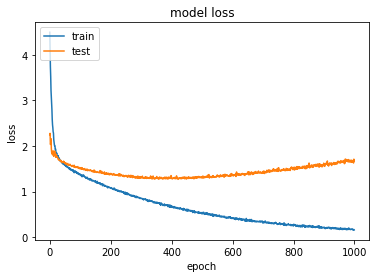

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()